# Tarea 4

**Envío del PR inicial:** viernes 28 de septiembre

**Aceptación del PR:** martes 9 de octubre

### Documentación del módulo $Mapeos.jl$

A grandes rasgos, el módulo `Mapeos.jl` contiene dos cosas útiles para el cálculo y análisis de órbitas. 

#### A. Tipo Mapeo (F, $x_0$; n)

El [tipo](https://docs.julialang.org/en/v0.6.0/manual/types/#man-types-1) `Mapeo` es un "ente" que contiene dentro suyo toda la información relevante de un mapeo, se define un mapeo de la siguiente forma

```julia
    mi_mapeo = Mapeo(F, x₀, n)
```
En donde `F` es una función, esto es el mapeo, `x₀` la condición inicial sobre la cual iterar, `n` el número de iteraciones. 

Dos puntos importantes deben mencionarse acerca de `Mapeo`:

##### [1] El tipo $Mapeo$ contiene 5 campos que pueden resultar útiles.
    
- `F::Function` es la función `F` que es evaluada en el punto inicial $x_0$.

- `x₀::Real` es la condición inicial a partir de la cual comienza a iterarse la función `F` para generar la órbita del mapeo.

- `n::Int` es el número de iteraciones que se aplicarán a la función `F`.

- `xnn::Vector{Float64}` es un vector que tiene por componenetes al punto inicial $x_0$ como primer elemento, y a cada uno de los $n$ iterados $X^n$.

- `div::Bool` es una variable booleana que devuelve la etiqueta `true` si la órbita diverge a infinito positivo (o a infitino negativo) en algún iterado $X^n$ elemento del vector $xnn$, o `false` si la órbita está definida (no diverge).

##### Ejemplo

Considérese el siguiente mapeo

```julia
Mapeo1 = Mapeo(G, 3.0, 100)
```

Para acceder a los disntintos campos se utiliza lo siguiente:

- `Mapeo1.F` devuelve la función `G` del mapeo $Mapeo1$.

- `Mapeo1.x₀` arroja la condición inicial a partir de la cual comienza a iterarse la función `G` para generar la órbita del mapeo.

- `Mapeo1.n` devuelve el número de iteraciones que se aplicaron a la función `G`.

- `Mapeo1.xnn` arroja el vector que genera la órbita de Mapeo1. Tiene por componenetes al punto inicial $x_0  = 3.0$ como primer elemento, y a cada uno de los $100$ iterados $X^n$ (desde $X^1$ hasta $X^{100}$).

- `div::Bool` es una variable booleana que devuelve la etiqueta `true` si la órbita diverge a infinito positivo (o a infitino negativo) en alguno de los $100$ iterados $X^n$ (elemenetos del vector $xnn$), o `false` si la órbita está definida (no diverge).

[2] El tipo `Mapeo` tiene un atributo `inf` el cual es una cantidad numérica a partir de la cual se considera que un iterado en el mapeo de F diverge a $\infty$. Por default se ha establecido el valor de este atributo como $inf=1e7$.


#### B. Función grafica_mapeo

La función `grafica_mapeo` genera el análisis gráfico correspondiente a la órbita del mapeo `F(x)` evaluado en el punto inicial $x_0$ e iterado un número $n$ de veces.  

`grafica_mapeo(F, n)` recibe un mapeo `F` y el intervalo de iteraciones que se desean incluir en el análisis gráfico. Se pueden añadir argumentos adicionales compatibles con `Plots`.

##### Ejemplo

```julia
    Mapeo1 = Mapeo(G, 3.0, 100)
```
Para graficar la órbita de este mapeo se hace

```julia
    grafica_mapeo(Mapeo1, 1:20, kws...)
```
En dónde `kws` son argumentos de `Plots`.
Lo anterior generará la gráfica de la órbita de `Mapeo1`, es posible graficar dos órbitas juntas, si existe un mapeo `Mapeo2` basta hacer

```julia
    grafica_mapeo!(Mapeo2, 1:20, kws...)
```

In [1]:
include("Mapeos.jl")
using Plots, LaTeXStrings, Mapeos
pyplot()

Plots.PyPlotBackend()

## 1

Para el mapeo $Q_c(x) = x^2 + c$, ¿cuál es el dominio $\cal{D}\subset \mathbb{R}$ de $Q_c(x)$ tal que la órbita generada por una condición inicial $x_0\in \cal{D}$ *no* escapa a infinito a ningún tiempo?

Definimos la función $Q_c(x) = x^2 + c$

In [2]:
Qc(x, c) = x^2 + c

Qc (generic function with 1 method)

Usando el módulo `Mapeos.jl` para el análisis gráfico de `Qc(x)` con diferentes valores de $c < 1/4$, obtenemos los siguientes reusltados:

### (a) $c = 0.10$

In [3]:
Qc1 = x -> Qc(x, 0.10)

(::#1) (generic function with 1 method)

In [4]:
rango1_x₀ = -2:0.1:2
mapeo1_Qc = [Mapeo(Qc1, x₀, 50) for x₀ in rango1_x₀];

In [5]:
for m in mapeo1_Qc
    println(m.x₀, "\t", m.div)
    end

-2.0	true
-1.9	true
-1.8	true
-1.7	true
-1.6	true
-1.5	true
-1.4	true
-1.3	true
-1.2	true
-1.1	true
-1.0	true
-0.9	true
-0.8	false
-0.7	false
-0.6	false
-0.5	false
-0.4	false
-0.3	false
-0.2	false
-0.1	false
0.0	false
0.1	false
0.2	false
0.3	false
0.4	false
0.5	false
0.6	false
0.7	false
0.8	false
0.9	true
1.0	true
1.1	true
1.2	true
1.3	true
1.4	true
1.5	true
1.6	true
1.7	true
1.8	true
1.9	true
2.0	true


In [6]:
mapeo1_false = []
mapeo1_true = []
for m in mapeo1_Qc
    if m.div == false
        push!(mapeo1_false, m)
        else m.div == true
        push!(mapeo1_true, m)
    end
end

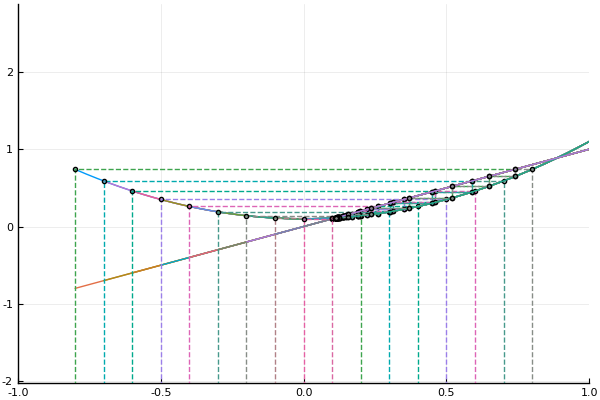

In [7]:
mapeo1 = grafica_mapeo(mapeo1_false[1], 1:50, legend=false)
for m in mapeo1_false[2:end]
    grafica_mapeo!(m, 1:50)
end
xlims!(-1,1)

mapeo1

### (b) $c = 0$

In [8]:
Qc2 = x -> Qc(x, 0.0)

(::#5) (generic function with 1 method)

In [9]:
rango2_x₀ = -2:0.1:2
mapeo2_Qc = [Mapeo(Qc2, x₀, 50) for x₀ in rango2_x₀];

In [10]:
for m in mapeo2_Qc
    println(m.x₀, "\t", m.div)
    end

-2.0	true
-1.9	true
-1.8	true
-1.7	true
-1.6	true
-1.5	true
-1.4	true
-1.3	true
-1.2	true
-1.1	true
-1.0	false
-0.9	false
-0.8	false
-0.7	false
-0.6	false
-0.5	false
-0.4	false
-0.3	false
-0.2	false
-0.1	false
0.0	false
0.1	false
0.2	false
0.3	false
0.4	false
0.5	false
0.6	false
0.7	false
0.8	false
0.9	false
1.0	false
1.1	true
1.2	true
1.3	true
1.4	true
1.5	true
1.6	true
1.7	true
1.8	true
1.9	true
2.0	true


In [11]:
mapeo2_false = []
mapeo2_true = []
for m in mapeo2_Qc
    if m.div == false
        push!(mapeo2_false, m)
        else m.div == true
        push!(mapeo2_true, m)
    end
end

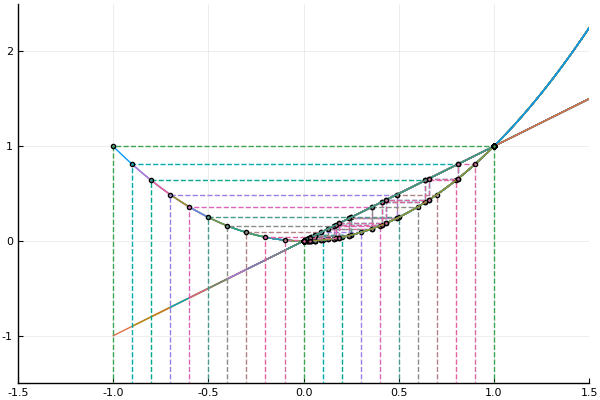

In [12]:
mapeo2 = grafica_mapeo(mapeo2_false[1], 1:50, legend=false)
for m in mapeo2_false[2:end]
    grafica_mapeo!(m, 1:50)
end
xlims!(-1.5,1.5)
ylims!(-1.5, 2.5)

mapeo2

### (c) $c = -0.10$

In [13]:
Qc3 = x -> Qc(x, -0.10)

(::#9) (generic function with 1 method)

In [14]:
rango3_x₀ = -2:0.1:2
mapeo3_Qc = [Mapeo(Qc3, x₀, 50) for x₀ in rango1_x₀];

In [15]:
for m in mapeo3_Qc
    println(m.x₀, "\t", m.div)
    end

-2.0	true
-1.9	true
-1.8	true
-1.7	true
-1.6	true
-1.5	true
-1.4	true
-1.3	true
-1.2	true
-1.1	true
-1.0	false
-0.9	false
-0.8	false
-0.7	false
-0.6	false
-0.5	false
-0.4	false
-0.3	false
-0.2	false
-0.1	false
0.0	false
0.1	false
0.2	false
0.3	false
0.4	false
0.5	false
0.6	false
0.7	false
0.8	false
0.9	false
1.0	false
1.1	true
1.2	true
1.3	true
1.4	true
1.5	true
1.6	true
1.7	true
1.8	true
1.9	true
2.0	true


In [16]:
mapeo3_false = []
mapeo3_true = []
for m in mapeo3_Qc
    if m.div == false
        push!(mapeo3_false, m)
        else m.div == true
        push!(mapeo3_true, m)
    end
end

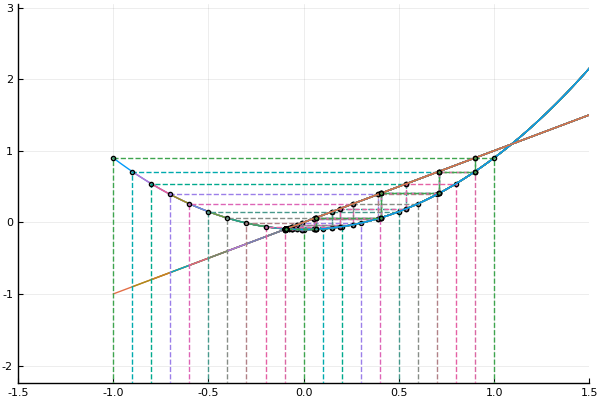

In [17]:
mapeo3 = grafica_mapeo(mapeo3_false[1], 1:25, legend=false)
for m in mapeo3_false[2:end]
    grafica_mapeo!(m, 1:25)
end
xlims!(-1.5,1.5)

mapeo3

### (d) $c = -0.50$

In [18]:
Qc4 = x -> Qc(x, -0.50)

(::#13) (generic function with 1 method)

In [19]:
rango4_x₀ = -2:0.2:2
mapeo4_Qc = [Mapeo(Qc4, x₀, 50) for x₀ in rango4_x₀];

In [20]:
for m in mapeo4_Qc
    println(m.x₀, "\t", m.div)
    end

-2.0	true
-1.8	true
-1.6	true
-1.4	true
-1.2	false
-1.0	false
-0.8	false
-0.6	false
-0.4	false
-0.2	false
0.0	false
0.2	false
0.4	false
0.6	false
0.8	false
1.0	false
1.2	false
1.4	true
1.6	true
1.8	true
2.0	true


In [21]:
mapeo4_false = []
mapeo4_true = []
for m in mapeo4_Qc
    if m.div == false
        push!(mapeo4_false, m)
        else m.div == true
        push!(mapeo4_true, m)
    end
end

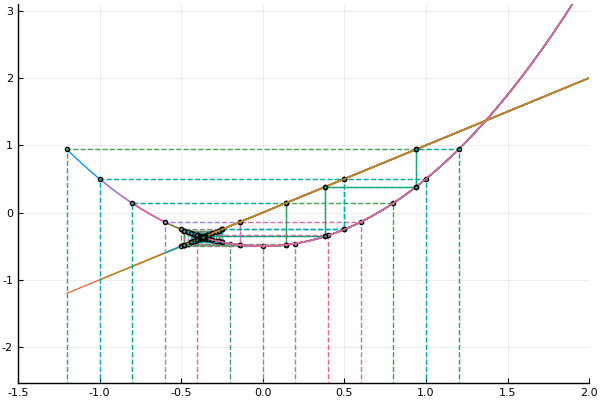

In [22]:
mapeo4 = grafica_mapeo(mapeo4_false[1], 1:25, legend=false)
for m in mapeo4_false[2:end]
    grafica_mapeo!(m, 1:25)
end
xlims!(-1.5, 2)

mapeo4

### (e) $c = - 0.8$

In [23]:
Qc5 = x -> Qc(x, - .8)

(::#17) (generic function with 1 method)

In [24]:
rango5_x₀ = -2:0.2:2
mapeo5_Qc = [Mapeo(Qc5, x₀, 50) for x₀ in rango5_x₀];

In [25]:
for m in mapeo5_Qc
    println(m.x₀, "\t", m.div)
    end

-2.0	true
-1.8	true
-1.6	true
-1.4	false
-1.2	false
-1.0	false
-0.8	false
-0.6	false
-0.4	false
-0.2	false
0.0	false
0.2	false
0.4	false
0.6	false
0.8	false
1.0	false
1.2	false
1.4	false
1.6	true
1.8	true
2.0	true


In [26]:
mapeo5_false = []
mapeo5_true = []
for m in mapeo5_Qc
    if m.div == false
        push!(mapeo5_false, m)
        else m.div == true
        push!(mapeo5_true, m)
    end
end

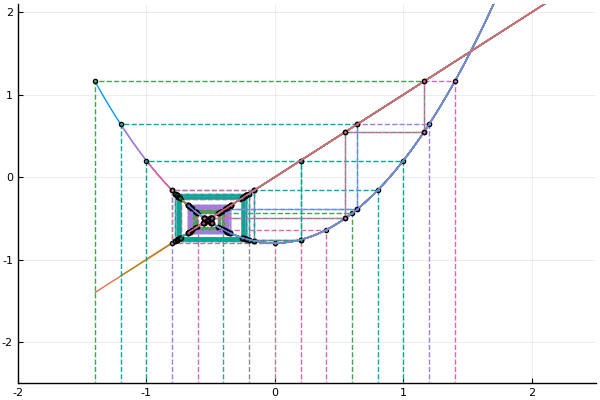

In [27]:
mapeo5 = grafica_mapeo(mapeo5_false[1], 1:25, legend=false)
for m in mapeo5_false[2:end]
    grafica_mapeo!(m, 1:25)
end
xlims!(-2, 2.5)
ylims!(-2.5, 2.1)

mapeo5

## 2

- Obtengan el diagrama de bifurcación que se muestra en la Fig. 2 del mapeo $Q_c(x)$ a partir de la iteración de una condición inicial.

- Caractericen la cuenca de atracción de $p_-(c)$ cuando el punto es estable.


In [28]:
p₊(c) = 1/2 * (1 + sqrt(1 - 4*c))
p₋(c) = 1/2 * (1 - sqrt(1 - 4*c))

p₋ (generic function with 1 method)

In [29]:
x0 = 0; # Por simplicidad tomemos el 0

In [30]:
# Ahora un rango en c
# Sabemos que ha de cumplir c < 1/4, entonces
rango_c = -5:0.05:1/4
Fs = [x -> Qc(x, c) for c in rango_c]; # Un arreglo con distintas funciones para distintas c

In [31]:
mapeos = [Mapeo(f, x0, 100) for f in Fs];

In [32]:
mask = [!m.div for m in mapeos] ;# esto es un vector de true donde son convergentes

In [33]:
no_div = mapeos[mask]
rango_c_nodiv = rango_c[mask];

In [34]:
c_estables = [c for c in rango_c_nodiv];

In [35]:
c_estables = []
δ = 0.001 # Hay que tomar una delta, puesto que no siempre se va a estar "justo" en el punto
for (i, m) in enumerate(no_div)
    abs(m.xnn[end] - p₋(rango_c_nodiv[i])) < δ ? push!(c_estables, rango_c_nodiv[i]): nothing
end

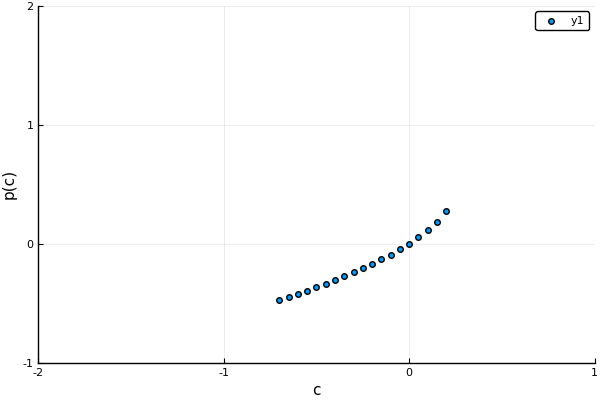

In [36]:
scatter(c_estables, p₋, xlabel="c", ylabel="p(c)")
xlims!(-2, 1); ylims!(-1, 2)

La cuenca de atracción es la encontrada en el inciso anterior, esto es
$$
-p_-(c)<x<p_-(c)
$$

## 3

Para el mapeo $F_\lambda(x) = \lambda x(1-x)$, ¿qué podemos decir de la bifurcación que ocurre en $\lambda_0=1$? ¿Es o no una bifurcación de silla-nodo?

In [37]:
Fₗ(λ, x) = λ * x * (1 - x)

Fₗ (generic function with 1 method)

In [38]:
λ₀ = 1
f1 = x -> Fₗ(λ₀, x)

(::#31) (generic function with 1 method)

Para este mapeo se ha de cumplir que su gráfica es tangente a la diagonal en $x_0$, veamos si es así.

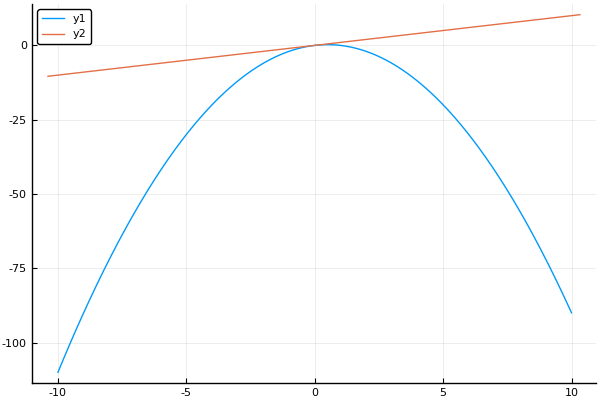

In [39]:
plot(-10:0.02:10, f1)
plot!(x->x)

Matemáticamente se tiene que cumplir la igualdad
$$
F_{\lambda_0}(x)=x-x^2=x\\
\Rightarrow -x^2=0\Rightarrow x=0
$$

Veamos que hace este punto.

In [40]:
x0 = 0 + rand()
mapeo = Mapeo(f1, x0, 20);

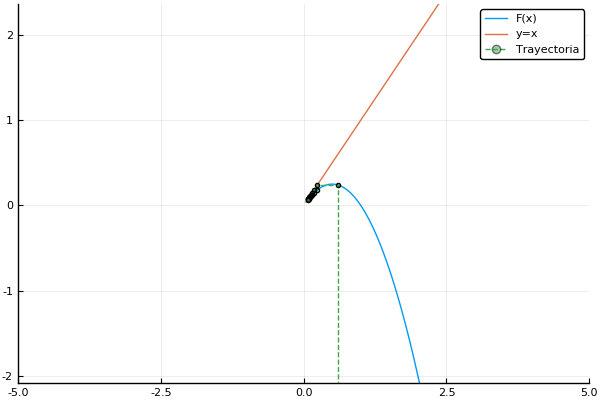

In [41]:
grafica_mapeo(mapeo, 1:20)
xlims!(-5,5)

## 4

- Obtengan numéricamente el diagrama de bifurcación del mapeo $Q_c(x)$ a partir de la iteración de una condición inicial en el intervalo de parámetros $-2<c<1/4$. Para esto se necesita iterar un gran número de veces (hasta llegar al ciclo periódico) condiciones iniciales, y repetir esto para *muchos* valores de $c$ en el intervalo. Vale la pena hacer notar que, si hay ciclos periódicos, *a priori* no conocen su periodicidad.

- Para ciertos valores de $c$ característicos, muestren el análisis gráfico del mapeo $Q_c(x)$ a fin de entender los resultados.


In [42]:
rango_c = -2:0.001:1/4
Fs = [x -> Qc(x, c) for c in rango_c];

In [43]:
x₀ = 0.0
mapeos = [Mapeo(F, x₀, 1000) for F in Fs];

In [44]:
# se va a tomar los últimos 101 puntos de cada mapeo
ps = [m.xnn[end-100:end] for m in mapeos];

In [45]:
cs = []
for c in rango_c
    for i in 1:101
        push!(cs, c)
    end
end

In [46]:
xn = []
for p in ps
    for x in p
        push!(xn, x)
    end
end

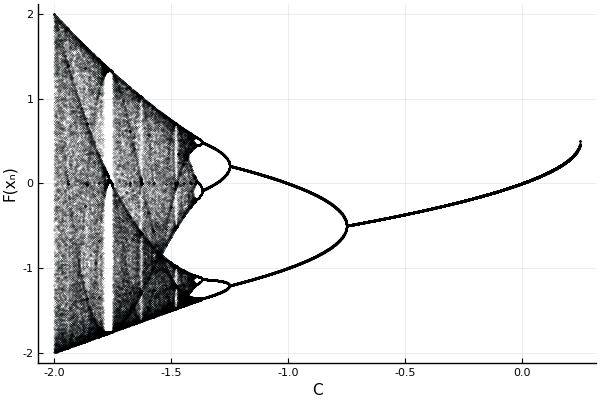

In [47]:
scatter(cs, xn, ms=.1, legend=false)
xlabel!("C")
ylabel!("F(xₙ)")

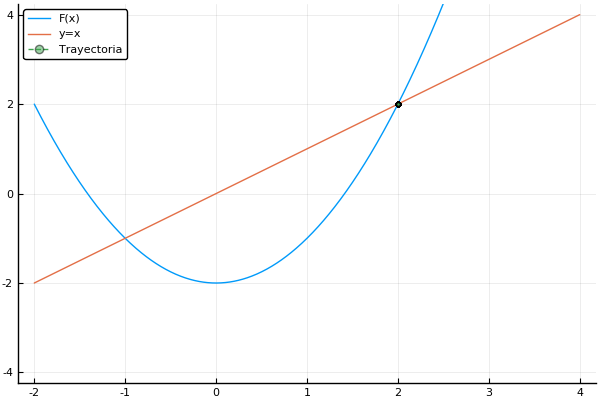

In [48]:
grafica_mapeo(mapeos[1], 800:1000)

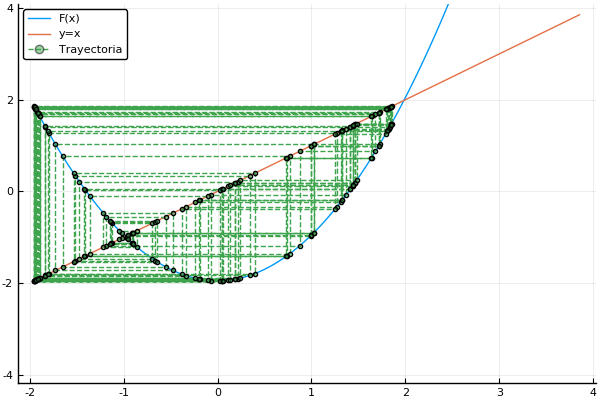

In [49]:
grafica_mapeo(mapeos[50], 800:1000)

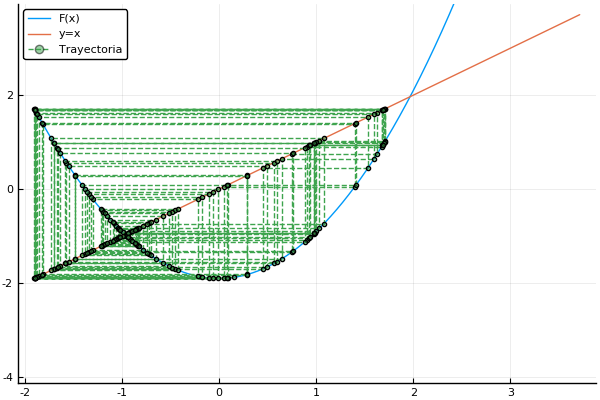

In [50]:
grafica_mapeo(mapeos[100], 800:1000)

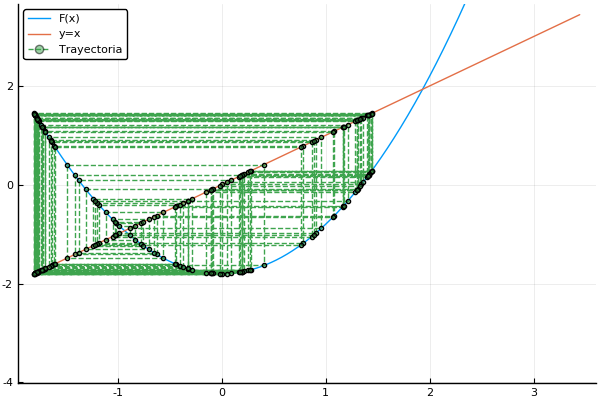

In [51]:
grafica_mapeo(mapeos[200], 800:1000)

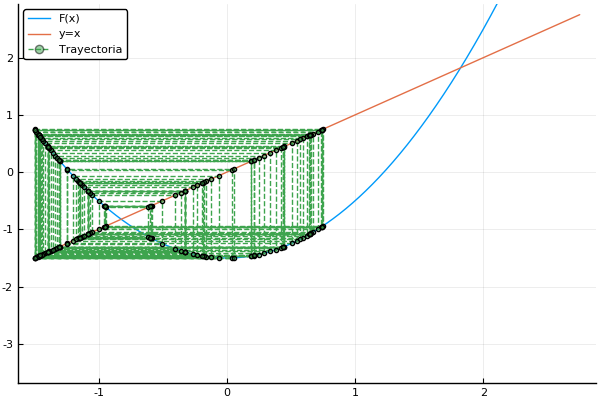

In [52]:
grafica_mapeo(mapeos[500], 800:1000)

## 5

El objetivo de este ejercicio es relacionar, la velocidad de convergencia con que un punto fijo (o una órbita periódica, en el caso de los dos últimos incisos) atraen a puntos suficientemente cercanos, con la derivada del mapeo en el punto fijo (o ciclo periódico). La idea es, entonces, calcular primero el punto fijo y, después, medir cómo la distancia de los iterados sucesivos (de una condición inicial $x_0$) al punto fijo se comporta en el tiempo, para los siguientes mapeos:

- $F(x) = x^2+0.25$

- $F(x) = 3x(1-x)$

- $F(x) = \exp(x-1)$

- $F(x) = x^2 - 1.25$

- $F(x) = \exp(x+1)$

Deberán resolver algunas cosas intermedias. Por ejemplo, ¿qué tanto deben acercarse al punto fijo, a fin de evitar ruido numérico? ¿Qué hay que hacer en el caso en que el punto tenga una estabilidad neutra, i.e., no sea no atractivo ni repulsivo?

En los dos últimos incisos, el interés está en los ciclos de periodo 2.